# Name: Yasaman Monazzah

Sprint 1

https://www.kaggle.com/datasets/jeandedieunyandwi/lending-club-dataset

__________________________________________________________________________________________________________________________________________

## Introduction




Banks and financial organizations must determine which applicants are eligible for loans and which are not. The goal of this case study is to find patterns in the data to assess whether or not a specific person should be awarded a loan. 

By recognizing trends in the data collection, financial institutions can make informed judgments and reduce business losses in the event of a loan default. This is because lending money to someone who is unlikely to repay the loan would result in financial losses for the institution. Understanding the characteristics that cause default is critical for businesses. Thus, it is vital to uncover patterns for clients who are unable to pay the loan by refusing the loan, lowering the loan amount, or raising the interest rate.


###  Setting Up Jupyter Notebook and Importing Libraries
<a class="anchor" id="part-1"></a>

In [1]:
# Basic data manipulation
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistical modeling
import statsmodels.api as sm

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Additional utilities
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor


In [2]:
# display all columns
pd.options.display.max_columns = None 

In [3]:
plt.rcParams['font.size'] = 17

## <a id='toc4_'></a>Part 1: Data Preprocessing [&#8593;](#toc0_)


In [4]:
## Reading the CSV file into a pandas DataFrame
df_backup = pd.read_csv('lending_club_loan_two.csv')

In [5]:
df=df_backup.copy()

### <a id='toc4_1_'></a>Step 1: Quick Overview of Dataset [&#8593;](#toc0_)

In [6]:
df.head(3)

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   

         emp_title emp_length home_ownership  annual_inc verification_status  \
0        Marketing  10+ years           RENT    117000.0        Not Verified   
1  Credit analyst     4 years       MORTGAGE     65000.0        Not Verified   
2     Statistician   < 1 year           RENT     43057.0     Source Verified   

    issue_d loan_status             purpose                    title    dti  \
0  Jan-2015  Fully Paid            vacation                 Vacation  26.24   
1  Jan-2015  Fully Paid  debt_consolidation       Debt consolidation  22.05   
2  Jan-2015  Fully Paid         credit_card  Credit card refinancing  12.79   

  earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0         Jun-1990      16.0      0.0    36369.0        41.8       25.0   
1         Jul-2004      17.0      0.0    20131.0        53.3       27.0   
2         Aug-2007      13.0      0.0    11987.0        92.2       26.0   

  initial_list_status application_type  mort_acc  pub_rec_bankruptcies  \
0                   w       INDIVIDUAL       0.0                   0.0   
1                   f       INDIVIDUAL       3.0                   0.0   
2                   f       INDIVIDUAL       0.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [8]:
# Check the dimensions of the dataset
df.shape

(396030, 27)

In [9]:
# Show % null value in each column:
round(df.isnull().sum() / df.shape[0] * 100.00,2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.14
address                 0.00
dtype: float64

In [10]:
df['loan_status'].unique()


array(['Fully Paid', 'Charged Off'], dtype=object)

In [11]:
df['loan_status'].value_counts(normalize=True)*100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

I am subsampling the data to create a base model initially. At the end of sprint 2, I will expand to the the full dataset and I will develop a function that applies all EDA techniques to the full data.


In [12]:
# Take a subsample
df_s=df.sample(frac=0.2, random_state=42) # 20% subsample with reproducibility 


In [13]:
df_s.shape
print(f'There are {df_s.shape[0]} rows and {df_s.shape[1]} columns in our sampled dataset.')

There are 79206 rows and 27 columns in our sampled dataset.


In [14]:
df_s['loan_status'] = df_s['loan_status'].replace(['Charged Off'], 'Default')
print(df_s['loan_status'].value_counts(normalize=True)*100)

loan_status
Fully Paid    80.333561
Default       19.666439
Name: proportion, dtype: float64


Sub sampling is giving  proportions that are fairly close to the original dataset's distribution in my target column

In [15]:
# check for duplicate rows
print(df_s.duplicated().sum())

0


There are no duplicate rows in our data.

df.T.duplicated().sum() 

In [16]:
# Show % null value in each column in sampled data:
round(df_s.isnull().sum() / df.shape[0] * 100.00,2)


loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               1.18
emp_length              0.94
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.09
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.01
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                1.92
pub_rec_bankruptcies    0.03
address                 0.00
dtype: float64

We will need to deal with missing values in all of these columns:

| Column                  | Missing Percentage |
|-------------------------|--------------------|
| emp_title               | 1.18%              |
| emp_length              | 0.94%              |
| title                   | 0.09%              |
| revol_util              | 0.01%              |
| mort_acc                | 1.92%              |
| pub_rec_bankruptcies    | 0.03%              |




Next, looking at the number of unique values in the categorical column `emp_title` and `title`:

In [17]:
df_s.emp_title.nunique()

43540

In [18]:
df_s.title.nunique()

12363

There are too many unique values in `emp_title`(43540) and `title`(12363). To avoid making assumptions, I will fill the null values with "unknown" at this time.

In [19]:
df_s['emp_title'].fillna('Unknown', inplace=True)
df_s['title'].fillna('Unknown', inplace=True)

C:\Users\ymona\AppData\Local\Temp\ipykernel_6536\4014121957.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_s['emp_title'].fillna('Unknown', inplace=True)
C:\Users\ymona\AppData\Local\Temp\ipykernel_6536\4014121957.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [20]:
round(df_s.isnull().sum() / df.shape[0] * 100.00,2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               0.00
emp_length              0.94
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.00
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.01
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                1.92
pub_rec_bankruptcies    0.03
address                 0.00
dtype: float64

we need to fill the missing values for `emp_length`; check the distribution of this column:

In [21]:
df_s['emp_length'].unique()

array(['10+ years', '2 years', '1 year', '8 years', '7 years', nan,
       '5 years', '4 years', '3 years', '9 years', '< 1 year', '6 years'],
      dtype=object)

In [22]:
# Proportional distribution
print(df_s['emp_length'].value_counts(normalize=True))

emp_length
10+ years    0.333068
2 years      0.094046
< 1 year     0.083900
3 years      0.083317
5 years      0.070667
1 year       0.068799
4 years      0.063819
6 years      0.055235
7 years      0.055103
8 years      0.050520
9 years      0.041526
Name: proportion, dtype: float64


C:\Users\ymona\AppData\Local\Temp\ipykernel_6536\3201428720.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_s['emp_length'], order=df_s['emp_length'].value_counts().index, palette="coolwarm")


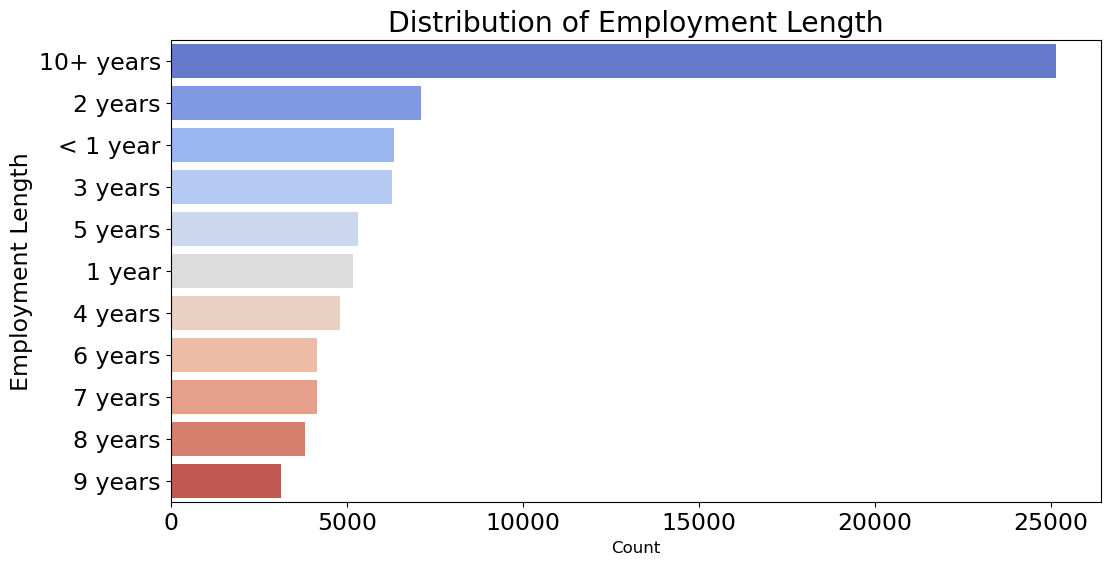

In [23]:
# Plot emp_length
plt.figure(figsize=(12, 6))

sns.countplot(y=df_s['emp_length'], order=df_s['emp_length'].value_counts().index, palette="coolwarm")

plt.title("Distribution of Employment Length")
plt.xlabel("Count", fontsize=12)
plt.ylabel("Employment Length")
plt.show()


In [24]:
# Remove the '+' sign 
df_s['emp_length_numeric'] = df_s['emp_length'].str.replace(r'\+', '', regex=True)

# Replace '< 1 year' 
df_s['emp_length_numeric'] = df_s['emp_length_numeric'].str.replace('< 1 year', '0')

#Replace Nulls with 0 (Best for Default Risk Models)
df_s['emp_length_numeric'] = df_s['emp_length_numeric'].str.replace('n/a', '0')

# Remove ' years' and ' year' (string replacement)
df_s['emp_length_numeric'] = df_s['emp_length_numeric'].str.replace(' years', '')
df_s['emp_length_numeric'] = df_s['emp_length_numeric'].str.replace(' year', '')

df_s['emp_length_numeric'] = df_s['emp_length_numeric'].astype(float)

print(df_s[['emp_length', 'emp_length_numeric']].head())


       emp_length  emp_length_numeric
362323  10+ years                10.0
220444    2 years                 2.0
345899    2 years                 2.0
93811      1 year                 1.0
182096    8 years                 8.0


In [25]:
# Function to categorize employment length into fewer groups
def categorize_emp_length(years):
    if years in [0, 1]:  # Less than 2 years
        return 'Less than 2 years'
    elif years in [2, 3, 4, 5]:  # Between 2-5 years
        return '2-5 years'
    elif years in [6, 7, 8, 9]:  # Between 6-10 years
        return '6-10 years'
    elif years == 10:  # Keep "10+ years" separate
        return 'More than 10 years'

# Apply function to create a new grouped column
df_s['emp_length_grouped'] = df_s['emp_length_numeric'].apply(categorize_emp_length)

In [26]:
# Check if grouping worked
print(df_s[['emp_length', 'emp_length_numeric', 'emp_length_grouped']].head())

       emp_length  emp_length_numeric  emp_length_grouped
362323  10+ years                10.0  More than 10 years
220444    2 years                 2.0           2-5 years
345899    2 years                 2.0           2-5 years
93811      1 year                 1.0   Less than 2 years
182096    8 years                 8.0          6-10 years


In [27]:
# drop the old columns 
df_s.drop(columns = ['emp_length', 'emp_length_numeric'],inplace=True)

Next we need to fill in the missing value for `mort_acc` column which is a float type data. 

In [28]:
df_s['mort_acc'].agg(['mean', 'median'])

mean      1.820141
median    1.000000
Name: mort_acc, dtype: float64

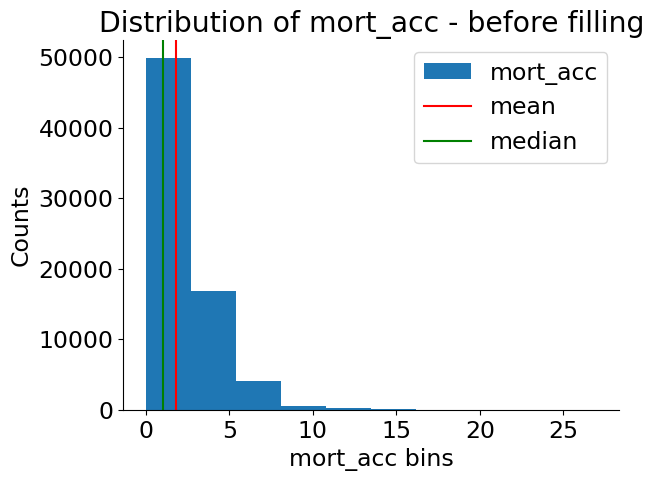

In [29]:
# check the distribution of mortgage accounts before filling
df_s['mort_acc'].plot(kind='hist', bins=10)
plt.axvline(df_s['mort_acc'].mean(), color='red', label="mean")
plt.axvline(df_s['mort_acc'].median(), color='green', label="median")
plt.title("Distribution of mort_acc - before filling")
plt.ylabel("Counts")
plt.xlabel("mort_acc bins")
sns.despine()

plt.legend()
plt.show()

Based on the statistics, the median is 1 while the mean is 1.82, which suggests the data for mort_acc is right-skewed. This means a few borrowers have a higher number of mortgage accounts, pulling the mean up to the right.

In this case, median for imputation is the better choice because it's less sensitive to extreme values and keeps the original data distribution.

In [30]:
median_mort_acc = df_s['mort_acc'].median()
df_s['mort_acc'].fillna(median_mort_acc, inplace=True)

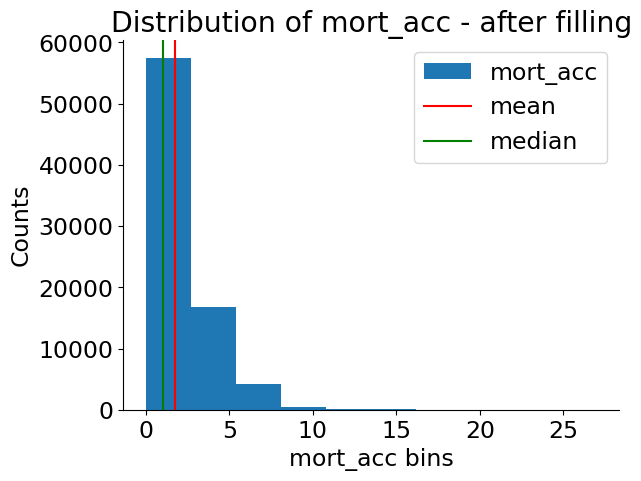

In [31]:
# check the distribution of mortgage accounts after filling the null values
df_s['mort_acc'].plot(kind='hist', bins=10)
plt.axvline(df_s['mort_acc'].mean(), color='red', label="mean")
plt.axvline(df_s['mort_acc'].median(), color='green', label="median")
plt.title("Distribution of mort_acc - after filling")
plt.ylabel("Counts")
plt.xlabel("mort_acc bins")
sns.despine()

plt.legend()
plt.show()

Next, we need to handle the missing values in the `revol_util` column, which contains float-type data.

`revol_util` shows how much of a person's credit is being used compared to the total available credit. A higher percentage means more credit usage. 

In [32]:
df_s['revol_util'].agg(['mean', 'median'])

mean      53.91857
median    54.90000
Name: revol_util, dtype: float64

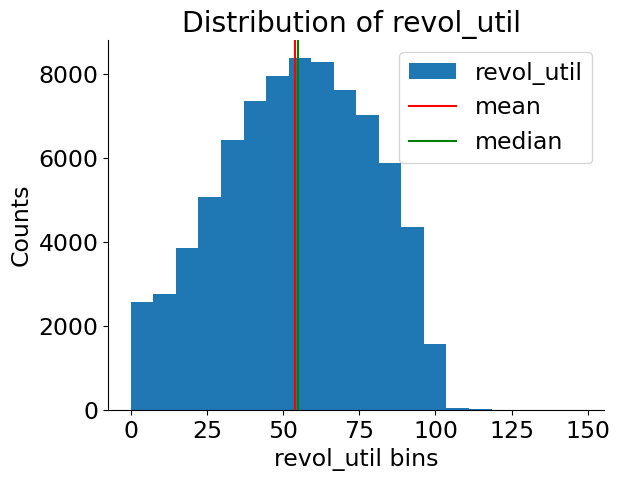

In [33]:
# check the distribution of revol_util
df_s['revol_util'].plot(kind='hist', bins=20)
plt.axvline(df_s['revol_util'].mean(), color='red', label="mean")
plt.axvline(df_s['revol_util'].median(), color='green', label="median")
plt.title("Distribution of revol_util ")
plt.ylabel("Counts")
plt.xlabel("revol_util bins")
sns.despine()

plt.legend()
plt.show()

The distribution is fairly symmetric since the mean (53.9) and median (54.9) for the `revol_util` column are very close. Imputing with either the mean or median is acceptable as the difference would be minor; however, the median is preferred because it is less sensitive to outliers

In [34]:
median_revol_util = df_s['revol_util'].median()
df_s['revol_util'].fillna(median_revol_util, inplace=True)

Next, we need to handle the missing values in the `pub_rec_bankruptcies` column, which contains float-type data.


In [35]:
df_s['pub_rec_bankruptcies'].agg(['mean', 'median'])

mean      0.123748
median    0.000000
Name: pub_rec_bankruptcies, dtype: float64

In [36]:
df_s['pub_rec_bankruptcies'].value_counts(normalize='true')

pub_rec_bankruptcies
0.0    0.883547
1.0    0.110763
2.0    0.004590
3.0    0.000809
4.0    0.000152
5.0    0.000101
8.0    0.000013
6.0    0.000013
7.0    0.000013
Name: proportion, dtype: float64

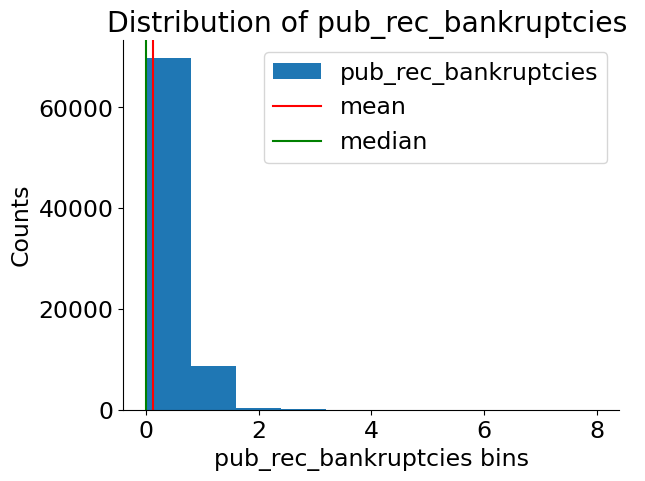

In [37]:
# check the distribution of pub_rec_bankruptcies
df_s['pub_rec_bankruptcies'].plot(kind='hist', bins=10)
plt.axvline(df_s['pub_rec_bankruptcies'].mean(), color='red', label="mean")
plt.axvline(df_s['pub_rec_bankruptcies'].median(), color='green', label="median")
plt.title("Distribution of pub_rec_bankruptcies ")
plt.ylabel("Counts")
plt.xlabel("pub_rec_bankruptcies bins")
sns.despine()

plt.legend()
plt.show()

Given that the majority of values in `pub_rec_bankruptcies` are 0 (88% with no bankruptcy records), filling the nulls with 0 (using the mode or median) will help maintain the overall distribution.

In [38]:
#fill the null with median
median_mort_acc = df_s['pub_rec_bankruptcies'].median()
df_s['pub_rec_bankruptcies'].fillna(median_mort_acc, inplace=True)

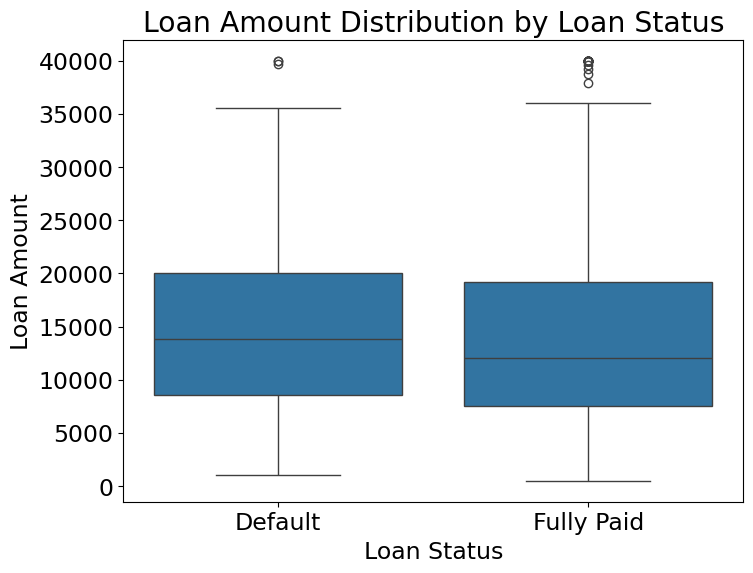

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df_s)
plt.title("Loan Amount Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()


In [40]:
df_s['home_ownership'].value_counts()

home_ownership
MORTGAGE    39922
RENT        31798
OWN          7458
OTHER          20
NONE            8
Name: count, dtype: int64

OTHER" (20 records) and "NONE" (8 records) are extremely small compared to the rest, it makes sense to drop them.

In [41]:
df_s.drop(index=df_s[df_s['home_ownership'].isin(['OTHER', 'NONE'])].index, inplace=True)

Homeownership type is a valuable predictor of loan default risk.

Higher risk: RENT & MORTGAGE borrowers.

Lower risk: Homeowners (OWN) who fully own their property.

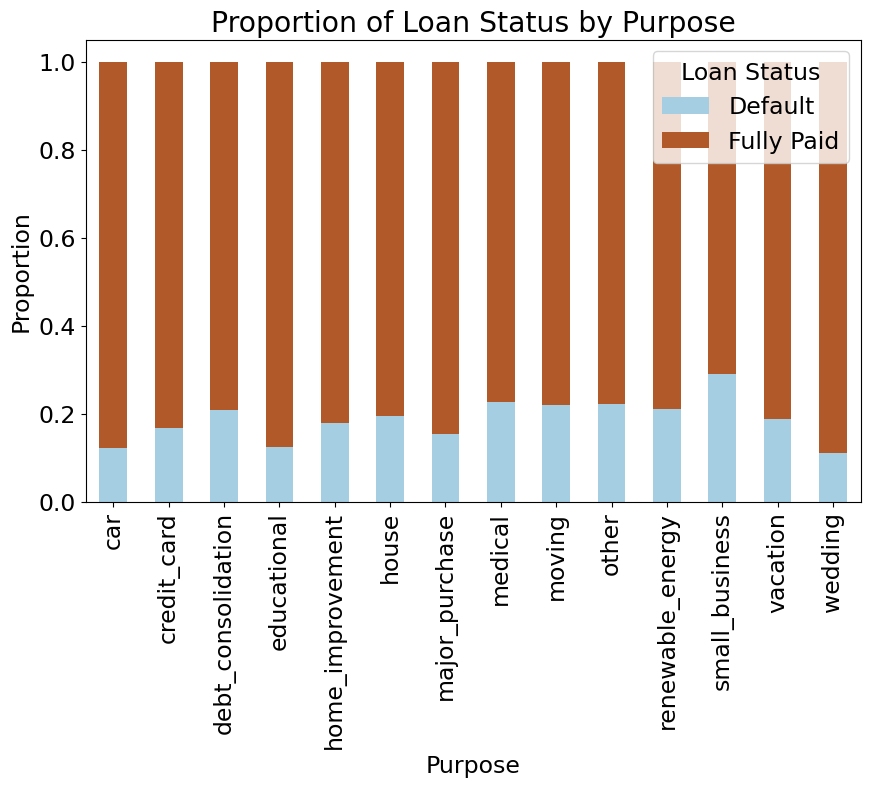

In [42]:
import pandas as pd

purpose_ct = pd.crosstab(df_s['purpose'], df_s['loan_status'], normalize='index')  
purpose_ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title("Proportion of Loan Status by Purpose")
plt.xlabel("Purpose")
plt.ylabel("Proportion")
plt.legend(title="Loan Status")
plt.show()


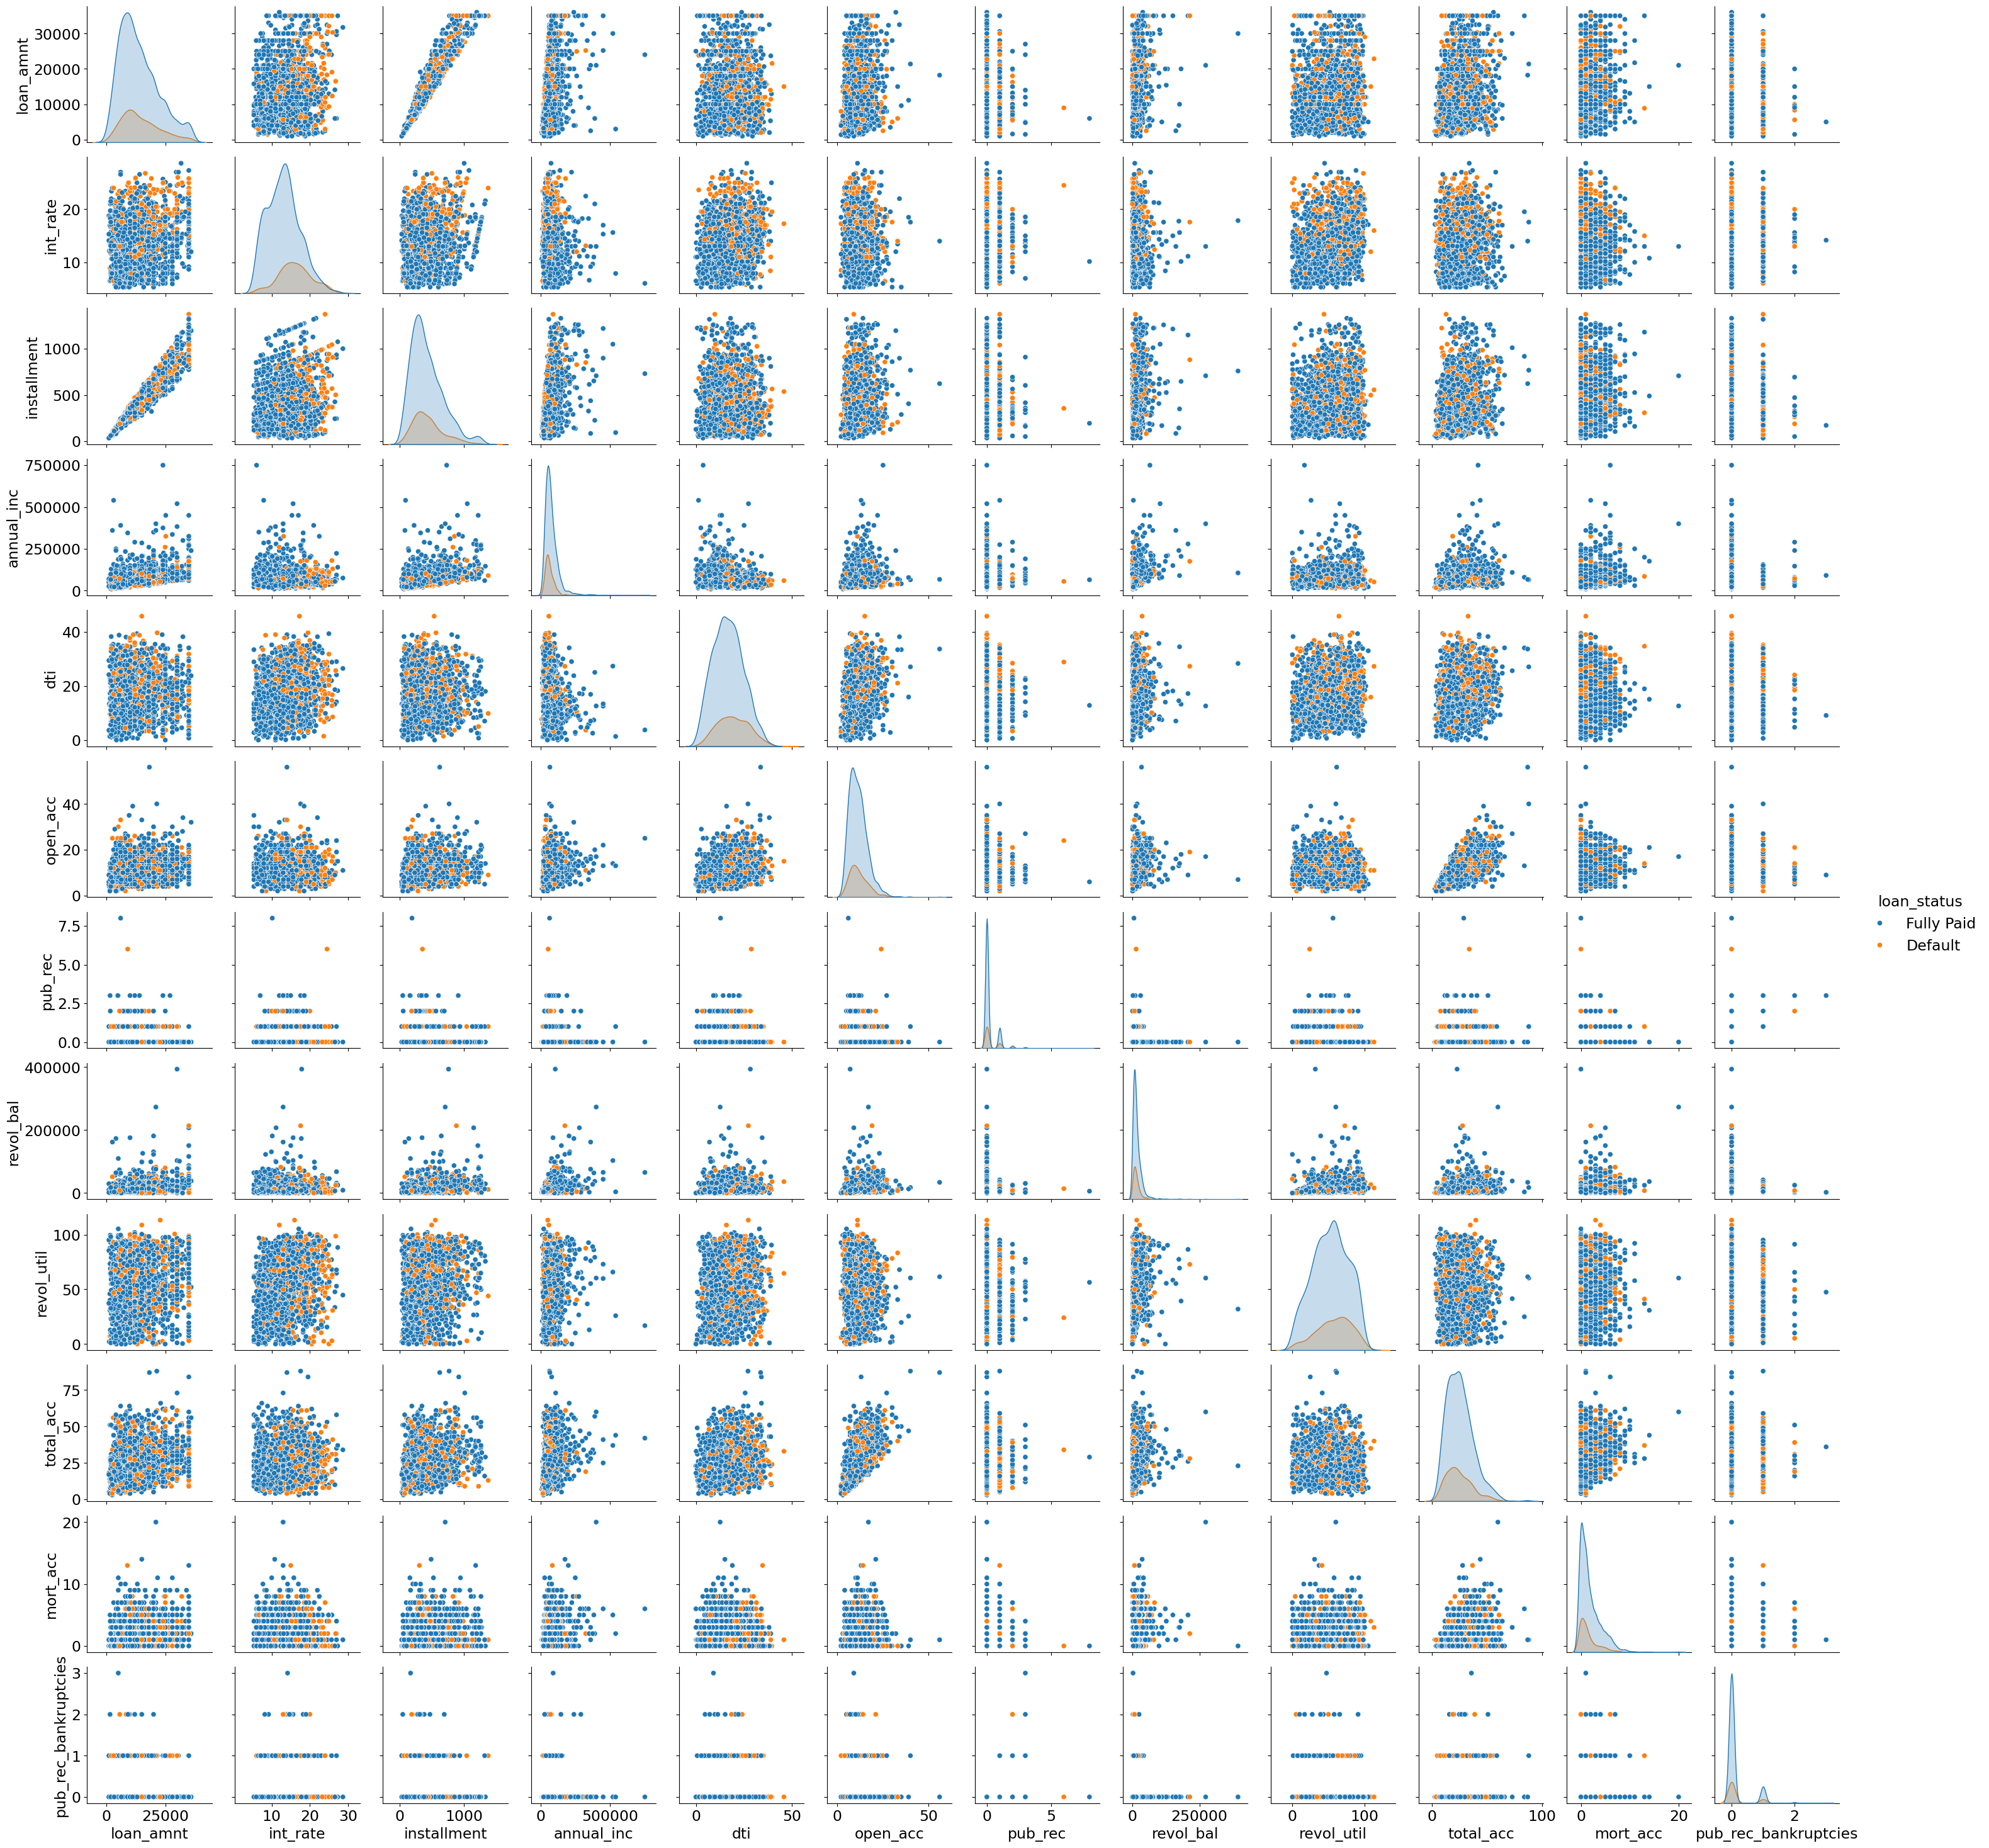

In [43]:
sns.pairplot(df_s.sample(2000),hue='loan_status')

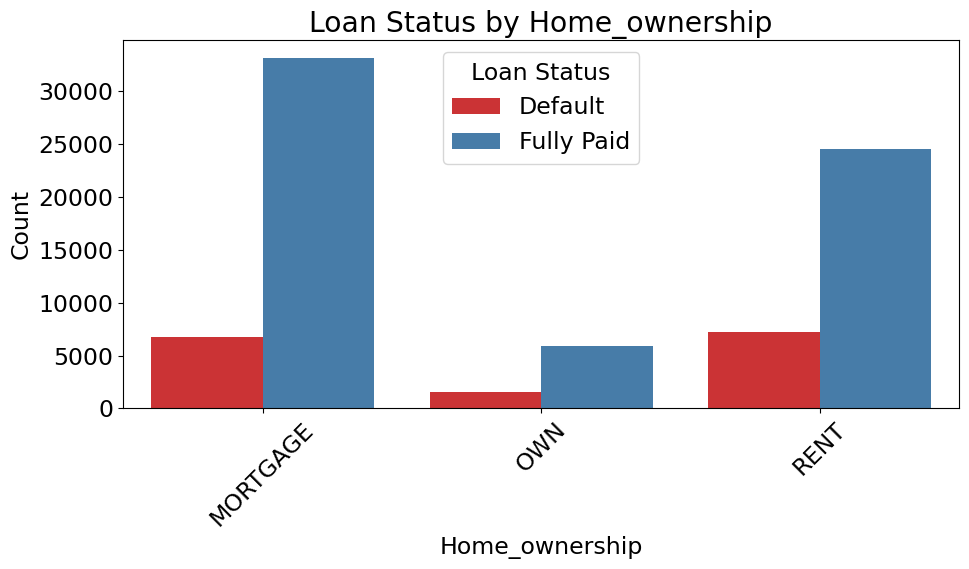

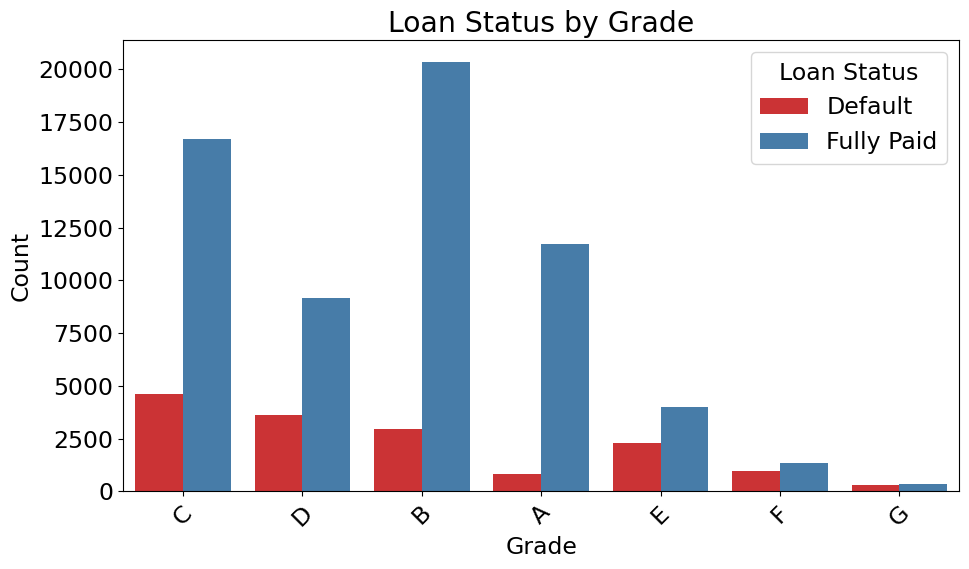

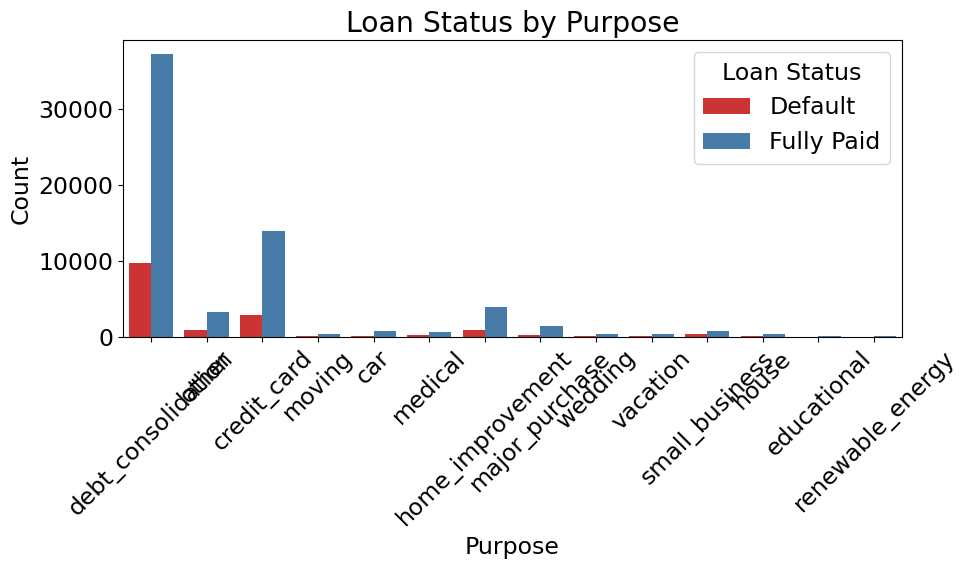

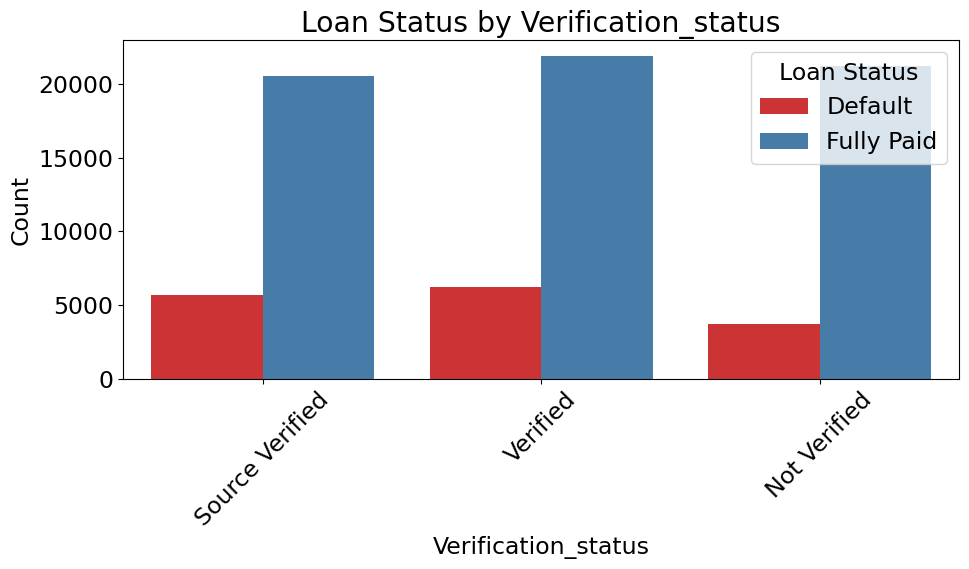

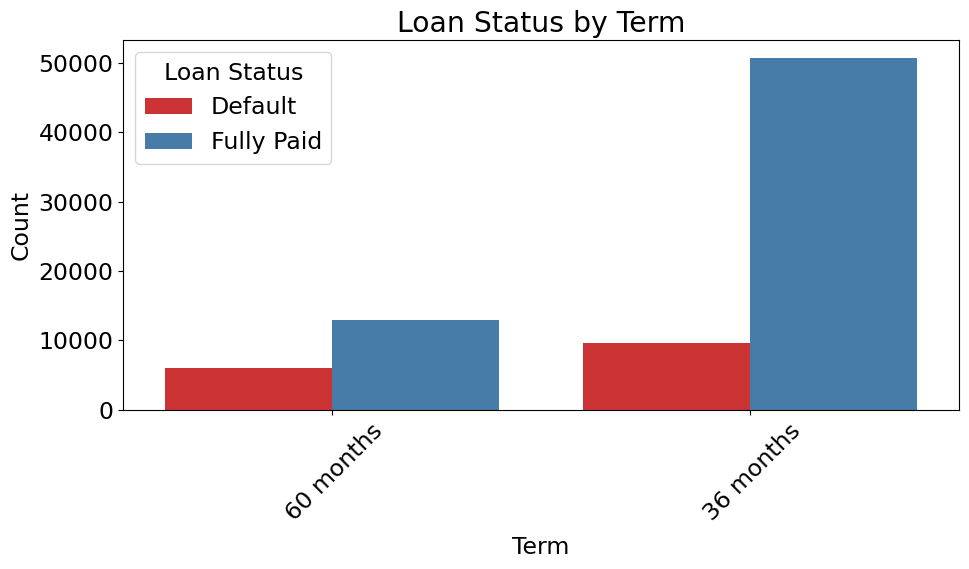

In [44]:
# List of categorical columns to plot
categorical_cols = [
    'home_ownership', 'grade', 'purpose', 'verification_status','term'
]

# Loop through each column and create a count plot
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='loan_status', data=df_s, palette='Set1')
    plt.title(f"Loan Status by {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.legend(title="Loan Status")
    plt.tight_layout()
    plt.show()


### Step 2: Preprocessing: Dependent Variable (loan_status)

In [45]:
df_s['loan_status'].value_counts(normalize=True)*100

loan_status
Fully Paid    80.334184
Default       19.665816
Name: proportion, dtype: float64

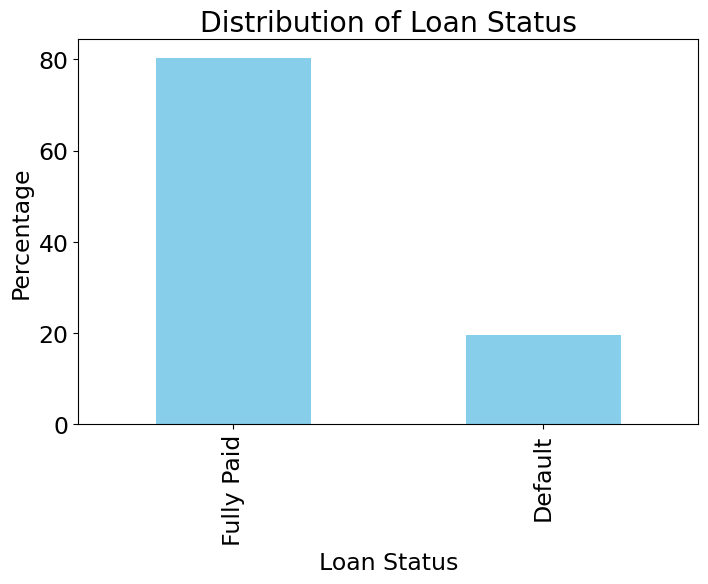

In [46]:
# visualize the target column
plt.figure(figsize=(8, 5))
df_s['loan_status'].value_counts(normalize=True).mul(100).plot(kind='bar', color='skyblue')
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.title('Distribution of Loan Status')
plt.show()

80% fully paid and 20% charged. This is imbalanced dataset,

80% of the loans being "Fully Paid" means most borrowers have paid back their loans completely as they had agreed to. 

The 20% "Charged Off" indicates that the lenders have stopped expecting more payments and has decided to write off the debt as a loss on their financial statements because the borrowers repeatedly missed due dates. This results in a loss for the lender.

In [47]:
#convert this column into 1s and 0s:
df_s['loan_status'] = np.where(df_s['loan_status'] == "Fully Paid", 1, 0)

In [48]:
df_s['loan_status'].value_counts()

loan_status
1    63607
0    15571
Name: count, dtype: int64

### Step 3: Preprocessing: Categorical Variables / Predictors 

Find the distribution of each column before doing any transformation:

In [49]:
object_cols = df_s.select_dtypes('object')
object_cols.head(3)

term grade sub_grade           emp_title home_ownership  \
362323   60 months     C        C4  mental health tech       MORTGAGE   
220444   36 months     D        D2              teller            OWN   
345899   36 months     D        D5    Business Analyst           RENT   

       verification_status   issue_d             purpose               title  \
362323     Source Verified  Oct-2014  debt_consolidation  Debt consolidation   
220444            Verified  Oct-2014  debt_consolidation  Debt consolidation   
345899     Source Verified  Oct-2014               other               Other   

       earliest_cr_line initial_list_status application_type  \
362323         Jan-1989                   w       INDIVIDUAL   
220444         Mar-2004                   f       INDIVIDUAL   
345899         Jun-2008                   f       INDIVIDUAL   

                                                  address  emp_length_grouped  
362323  557 Melvin Prairie Suite 186\r\nCherylborough,...  More than 10 years  
220444  93333 Christopher Trafficway\r\nSouth Joshuavi...           2-5 years  
345899   1021 Katherine Ville\r\nChristopherton, NJ 70466           2-5 years

In [50]:
print(object_cols.nunique())

term                       2
grade                      7
sub_grade                 35
emp_title              43520
home_ownership             3
verification_status        3
issue_d                  114
purpose                   14
title                  12350
earliest_cr_line         615
initial_list_status        2
application_type           3
address                79061
emp_length_grouped         4
dtype: int64


In [51]:
# Get column names where unique values are less than 15
low_unique_cols = object_cols.nunique()[lambda x: x < 15].index.tolist()
print(low_unique_cols)


['term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'emp_length_grouped']


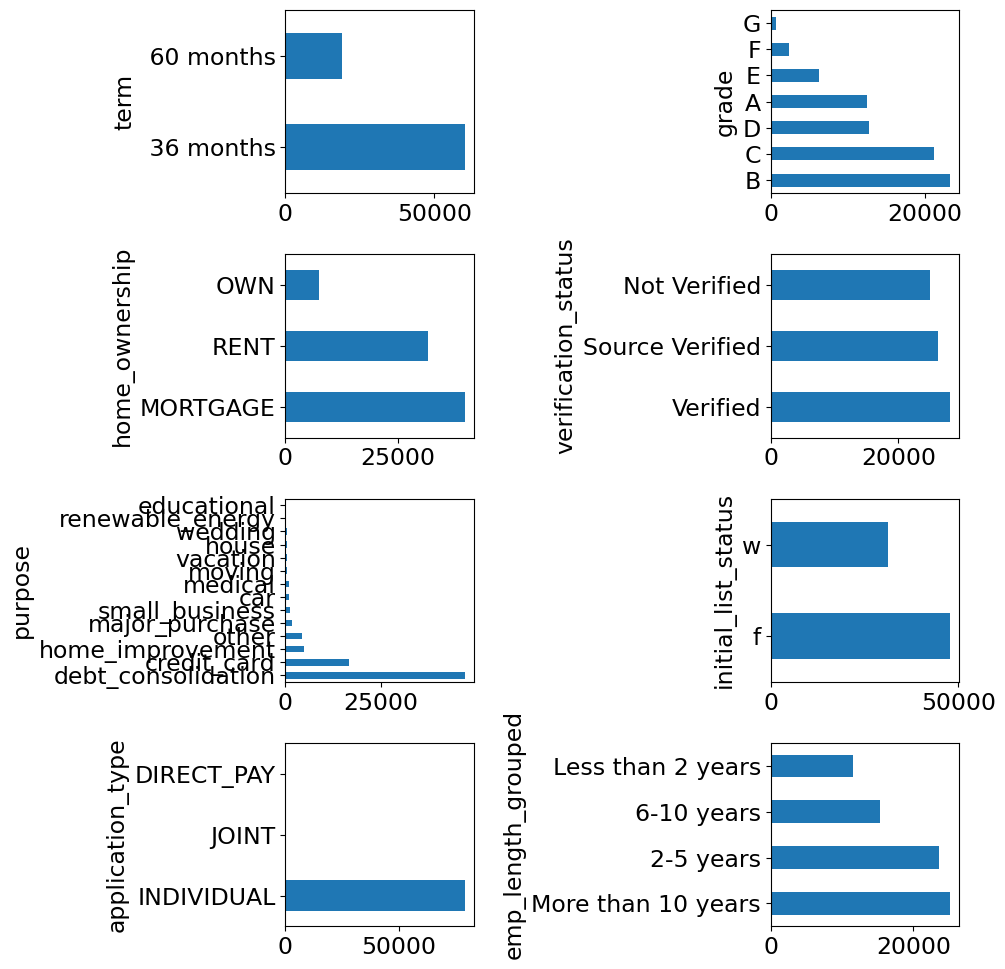

In [52]:
# Loop through positions and add plots instead of manually creating single plots

nrows=4
ncols=2

plt.subplots(nrows, ncols, figsize=(10,10))

for i, col in enumerate(low_unique_cols): 

    plt.subplot(nrows, ncols, i+1) 
    df_s[col].value_counts().plot(kind='barh')


plt.tight_layout() 
plt.show()

***
**ACTION PLAN** 

Binary Encoding ===> binary the resulting will have 2 category: 0 and 1 .  
- `term` (36 months 1, 60 months 0)
- `initial_list_status` (f 1, w 0)
- `application_type` (INDIVIDUAL 1, JOINT 0, DIRECT_PAY_0)

Dummy Variables for categorical columns==> 
- `grade`
- `emp_length`
- `home_ownership`
- `verification_status`
- `purpose`
- `home_ownership`



Columns with more than 15 subcategory ==> combine to fewer subcategory
- `sub_grade `
- `emp_title`
- `issue_d`
- `title`
- `earliest_cr_line `
- `address`

***

#Extract month from column `term` and convert it to integer:

In [53]:
df_s['term'].value_counts()

term
36 months    60286
60 months    18892
Name: count, dtype: int64

In [54]:
# Remove the word "months" and convert term to integer
df_s['term_months_numeric'] = df_s['term'].str.replace(' months', '').astype(int)
print(df_s[['term', 'term_months_numeric']].head())


              term  term_months_numeric
362323   60 months                   60
220444   36 months                   36
345899   36 months                   36
93811    36 months                   36
182096   36 months                   36


#### Binary Encoding

In [55]:
# Step 1: Map values (binarize)

# term 
df_s['36_term_month'] = df_s['term_months_numeric'].map({36: 1, 60: 0})

# initial_list_status 
df_s["list_fractional_loan"] = df_s["initial_list_status"].map({"f": 1, "w": 0})

#application_type_individua
df_s['application_type_individual'] = df_s['application_type'].map({'INDIVIDUAL': 1, 'JOINT': 0, 'DIRECT_PAY': 0})

In [56]:
# Step 2: Check results

print(df_s['36_term_month'].value_counts())
print(df_s['list_fractional_loan'].value_counts())
print(df_s['application_type_individual'].value_counts())

36_term_month
1    60286
0    18892
Name: count, dtype: int64
list_fractional_loan
1    47829
0    31349
Name: count, dtype: int64
application_type_individual
1    79050
0      128
Name: count, dtype: int64


In [57]:
# Step 3: Drop old columns 
df_s.drop(columns = ['term','term_months_numeric', 'initial_list_status','application_type'],inplace=True)


In [58]:
df_s.head(3)

loan_amnt  int_rate  installment grade sub_grade           emp_title  \
362323    14000.0     14.49       329.33     C        C4  mental health tech   
220444     6050.0     16.29       213.57     D        D2              teller   
345899    20775.0     18.24       753.57     D        D5    Business Analyst   

       home_ownership  annual_inc verification_status   issue_d  loan_status  \
362323       MORTGAGE     80000.0     Source Verified  Oct-2014            0   
220444            OWN     20400.0            Verified  Oct-2014            1   
345899           RENT     65000.0     Source Verified  Oct-2014            1   

                   purpose               title    dti earliest_cr_line  \
362323  debt_consolidation  Debt consolidation  17.04         Jan-1989   
220444  debt_consolidation  Debt consolidation  28.08         Mar-2004   
345899               other               Other  15.30         Jun-2008   

        open_acc  pub_rec  revol_bal  revol_util  total_acc  mort_acc  \
362323      10.0      0.0    12223.0        63.7       16.0       2.0   
220444      11.0      0.0     2577.0        13.3       24.0       0.0   
345899       9.0      0.0    21872.0        36.5       10.0       0.0   

        pub_rec_bankruptcies  \
362323                   0.0   
220444                   0.0   
345899                   0.0   

                                                  address  emp_length_grouped  \
362323  557 Melvin Prairie Suite 186\r\nCherylborough,...  More than 10 years   
220444  93333 Christopher Trafficway\r\nSouth Joshuavi...           2-5 years   
345899   1021 Katherine Ville\r\nChristopherton, NJ 70466           2-5 years   

        36_term_month  list_fractional_loan  application_type_individual  
362323              0                     0                            1  
220444              1                     1                            1  
345899              1                     1                            1

#### Dummy Variables


In [59]:
# grade
df_s['grade'].value_counts(normalize='true')

grade
B    0.294312
C    0.268686
D    0.161307
A    0.158491
E    0.079227
F    0.029667
G    0.008310
Name: proportion, dtype: float64

In [60]:
# Group 'grade' (A, B, C, D, E, F, G) into broader categories before dummies 
df_s['grade_category'] = df_s['grade'].map({
    'A': 'Good Grade',
    'B': 'Good Grade',
    'C': 'Average Grade',
    'D': 'Average Grade',
    'E': 'Poor Grade',
    'F': 'Poor Grade',
    'G': 'Poor Grade'
})

df_s[['grade', 'grade_category']].head()


grade grade_category
362323     C  Average Grade
220444     D  Average Grade
345899     D  Average Grade
93811      C  Average Grade
182096     B     Good Grade

In [61]:
# Now apply dummy encoding
grade_category_dummies = pd.get_dummies(df_s['grade_category']).astype(int)
grade_category_dummies.head()

Average Grade  Good Grade  Poor Grade
362323              1           0           0
220444              1           0           0
345899              1           0           0
93811               1           0           0
182096              0           1           0

In [62]:
df_s = pd.concat([df_s,grade_category_dummies], axis=1)

In [63]:
# drop the old columns 
df_s.drop(columns = ['grade','grade_category'],inplace=True)
df_s.head(3)

loan_amnt  int_rate  installment sub_grade           emp_title  \
362323    14000.0     14.49       329.33        C4  mental health tech   
220444     6050.0     16.29       213.57        D2              teller   
345899    20775.0     18.24       753.57        D5    Business Analyst   

       home_ownership  annual_inc verification_status   issue_d  loan_status  \
362323       MORTGAGE     80000.0     Source Verified  Oct-2014            0   
220444            OWN     20400.0            Verified  Oct-2014            1   
345899           RENT     65000.0     Source Verified  Oct-2014            1   

                   purpose               title    dti earliest_cr_line  \
362323  debt_consolidation  Debt consolidation  17.04         Jan-1989   
220444  debt_consolidation  Debt consolidation  28.08         Mar-2004   
345899               other               Other  15.30         Jun-2008   

        open_acc  pub_rec  revol_bal  revol_util  total_acc  mort_acc  \
362323      10.0      0.0    12223.0        63.7       16.0       2.0   
220444      11.0      0.0     2577.0        13.3       24.0       0.0   
345899       9.0      0.0    21872.0        36.5       10.0       0.0   

        pub_rec_bankruptcies  \
362323                   0.0   
220444                   0.0   
345899                   0.0   

                                                  address  emp_length_grouped  \
362323  557 Melvin Prairie Suite 186\r\nCherylborough,...  More than 10 years   
220444  93333 Christopher Trafficway\r\nSouth Joshuavi...           2-5 years   
345899   1021 Katherine Ville\r\nChristopherton, NJ 70466           2-5 years   

        36_term_month  list_fractional_loan  application_type_individual  \
362323              0                     0                            1   
220444              1                     1                            1   
345899              1                     1                            1   

        Average Grade  Good Grade  Poor Grade  
362323              1           0           0  
220444              1           0           0  
345899              1           0           0

In [64]:
# Now apply dummy encoding to emp_length_grouped
emp_length_grouped_dummies = pd.get_dummies(df_s['emp_length_grouped']).astype(int)
emp_length_grouped_dummies.head()

2-5 years  6-10 years  Less than 2 years  More than 10 years
362323          0           0                  0                   1
220444          1           0                  0                   0
345899          1           0                  0                   0
93811           0           0                  1                   0
182096          0           1                  0                   0

In [65]:
df_s = pd.concat([df_s,emp_length_grouped_dummies], axis=1)

In [66]:
df_s = df_s.drop(columns=['2-5 years','emp_length_grouped'])

In [67]:
df_s['home_ownership'].value_counts()

home_ownership
MORTGAGE    39922
RENT        31798
OWN          7458
Name: count, dtype: int64

In [68]:
# Now apply dummy encoding to home_ownership
home_ownership_dummies = pd.get_dummies(df_s['home_ownership']).astype(int)
home_ownership_dummies.head()

MORTGAGE  OWN  RENT
362323         1    0     0
220444         0    1     0
345899         0    0     1
93811          0    0     1
182096         1    0     0

In [69]:
df_s = pd.concat([df_s,home_ownership_dummies], axis=1)

In [70]:
# drop the old column and the reference column
df_s = df_s.drop(columns=['home_ownership','OWN'])
df_s.head()

loan_amnt  int_rate  installment sub_grade                emp_title  \
362323    14000.0     14.49       329.33        C4       mental health tech   
220444     6050.0     16.29       213.57        D2                   teller   
345899    20775.0     18.24       753.57        D5         Business Analyst   
93811      6000.0     13.99       205.04        C4  Outreach and Enrollment   
182096    17450.0     13.11       588.89        B4  Pinellas county schools   

        annual_inc verification_status   issue_d  loan_status  \
362323     80000.0     Source Verified  Oct-2014            0   
220444     20400.0            Verified  Oct-2014            1   
345899     65000.0     Source Verified  Oct-2014            1   
93811      38848.0            Verified  Apr-2015            0   
182096     65000.0        Not Verified  Mar-2013            1   

                   purpose                    title    dti earliest_cr_line  \
362323  debt_consolidation       Debt consolidation  17.04         Jan-1989   
220444  debt_consolidation       Debt consolidation  28.08         Mar-2004   
345899               other                    Other  15.30         Jun-2008   
93811          credit_card  Credit card refinancing  16.59         Dec-1984   
182096         credit_card   Three years to freedom  12.06         Apr-1992   

        open_acc  pub_rec  revol_bal  revol_util  total_acc  mort_acc  \
362323      10.0      0.0    12223.0        63.7       16.0       2.0   
220444      11.0      0.0     2577.0        13.3       24.0       0.0   
345899       9.0      0.0    21872.0        36.5       10.0       0.0   
93811       17.0      4.0     6873.0        38.2       29.0       5.0   
182096      11.0      0.0    30557.0        47.8       31.0       1.0   

        pub_rec_bankruptcies  \
362323                   0.0   
220444                   0.0   
345899                   0.0   
93811                    3.0   
182096                   0.0   

                                                  address  36_term_month  \
362323  557 Melvin Prairie Suite 186\r\nCherylborough,...              0   
220444  93333 Christopher Trafficway\r\nSouth Joshuavi...              1   
345899   1021 Katherine Ville\r\nChristopherton, NJ 70466              1   
93811              793 Grant Key\r\nLake Janice, MD 93700              1   
182096        36882 Nicole Common\r\nLake Brian, NY 00813              1   

        list_fractional_loan  application_type_individual  Average Grade  \
362323                     0                            1              1   
220444                     1                            1              1   
345899                     1                            1              1   
93811                      1                            1              1   
182096                     1                            1              0   

        Good Grade  Poor Grade  6-10 years  Less than 2 years  \
362323           0           0           0                  0   
220444           0           0           0                  0   
345899           0           0           0                  0   
93811            0           0           0                  1   
182096           1           0           1                  0   

        More than 10 years  MORTGAGE  RENT  
362323                   1         1     0  
220444                   0         0     0  
345899                   0         0     1  
93811                    0         0     1  
182096                   0         1     0

In [71]:
# emp_title
df_s['sub_grade'].value_counts()

sub_grade
B3    5395
B4    5249
C1    4734
C2    4574
B2    4501
B5    4348
C3    4273
C4    4095
B1    3810
A5    3638
C5    3598
D1    3143
A4    3018
D2    2806
D3    2468
D4    2359
A3    2075
D5    1996
A1    1931
A2    1887
E1    1539
E2    1530
E3    1235
E4    1065
E5     904
F1     683
F2     559
F3     460
F4     363
F5     284
G1     231
G2     154
G3     137
G4      72
G5      64
Name: count, dtype: int64

Since each sub-grade begins with a letter (A-G), we could simplify it by grouping based on the first letter. However, since we already have a grade column that serves this purpose, keeping sub_grade would be redundant. Therefore, it will be dropped.

In [72]:
# drop sub_grade column
df_s = df_s.drop(columns=['sub_grade'])
df_s.head()

loan_amnt  int_rate  installment                emp_title  annual_inc  \
362323    14000.0     14.49       329.33       mental health tech     80000.0   
220444     6050.0     16.29       213.57                   teller     20400.0   
345899    20775.0     18.24       753.57         Business Analyst     65000.0   
93811      6000.0     13.99       205.04  Outreach and Enrollment     38848.0   
182096    17450.0     13.11       588.89  Pinellas county schools     65000.0   

       verification_status   issue_d  loan_status             purpose  \
362323     Source Verified  Oct-2014            0  debt_consolidation   
220444            Verified  Oct-2014            1  debt_consolidation   
345899     Source Verified  Oct-2014            1               other   
93811             Verified  Apr-2015            0         credit_card   
182096        Not Verified  Mar-2013            1         credit_card   

                          title    dti earliest_cr_line  open_acc  pub_rec  \
362323       Debt consolidation  17.04         Jan-1989      10.0      0.0   
220444       Debt consolidation  28.08         Mar-2004      11.0      0.0   
345899                    Other  15.30         Jun-2008       9.0      0.0   
93811   Credit card refinancing  16.59         Dec-1984      17.0      4.0   
182096   Three years to freedom  12.06         Apr-1992      11.0      0.0   

        revol_bal  revol_util  total_acc  mort_acc  pub_rec_bankruptcies  \
362323    12223.0        63.7       16.0       2.0                   0.0   
220444     2577.0        13.3       24.0       0.0                   0.0   
345899    21872.0        36.5       10.0       0.0                   0.0   
93811      6873.0        38.2       29.0       5.0                   3.0   
182096    30557.0        47.8       31.0       1.0                   0.0   

                                                  address  36_term_month  \
362323  557 Melvin Prairie Suite 186\r\nCherylborough,...              0   
220444  93333 Christopher Trafficway\r\nSouth Joshuavi...              1   
345899   1021 Katherine Ville\r\nChristopherton, NJ 70466              1   
93811              793 Grant Key\r\nLake Janice, MD 93700              1   
182096        36882 Nicole Common\r\nLake Brian, NY 00813              1   

        list_fractional_loan  application_type_individual  Average Grade  \
362323                     0                            1              1   
220444                     1                            1              1   
345899                     1                            1              1   
93811                      1                            1              1   
182096                     1                            1              0   

        Good Grade  Poor Grade  6-10 years  Less than 2 years  \
362323           0           0           0                  0   
220444           0           0           0                  0   
345899           0           0           0                  0   
93811            0           0           0                  1   
182096           1           0           1                  0   

        More than 10 years  MORTGAGE  RENT  
362323                   1         1     0  
220444                   0         0     0  
345899                   0         0     1  
93811                    0         0     1  
182096                   0         1     0

In [73]:
# emp_title
df_s['emp_title'].nunique()

43520

In [74]:

top_titles = df_s['emp_title'].value_counts().nlargest(20).index
print(top_titles)

Index(['Unknown', 'Manager', 'Teacher', 'Supervisor', 'Registered Nurse', 'RN',
       'Sales', 'Project Manager', 'Owner', 'Office Manager', 'Driver',
       'manager', 'Director', 'Engineer', 'driver', 'General Manager',
       'teacher', 'Vice President', 'Operations Manager', 'President'],
      dtype='object', name='emp_title')


`emp_title` has too many unique values to convert to a dummy variable feature. 

 Let's remove the emp_title column as it can not be usefull for the model. 

In [75]:
# Drop the emp_title column
df_s = df_s.drop('emp_title',axis=1)

In [76]:
 df_s['verification_status'].value_counts()

verification_status
Verified           28079
Source Verified    26233
Not Verified       24866
Name: count, dtype: int64

In [77]:
# Now apply dummy encoding to verification_status
verification_status_dummies = pd.get_dummies(df_s['verification_status']).astype(int)
verification_status_dummies.head()

Not Verified  Source Verified  Verified
362323             0                1         0
220444             0                0         1
345899             0                1         0
93811              0                0         1
182096             1                0         0

In [78]:
df_s = pd.concat([df_s,verification_status_dummies], axis=1)

In [79]:
df_s.head()


loan_amnt  int_rate  installment  annual_inc verification_status  \
362323    14000.0     14.49       329.33     80000.0     Source Verified   
220444     6050.0     16.29       213.57     20400.0            Verified   
345899    20775.0     18.24       753.57     65000.0     Source Verified   
93811      6000.0     13.99       205.04     38848.0            Verified   
182096    17450.0     13.11       588.89     65000.0        Not Verified   

         issue_d  loan_status             purpose                    title  \
362323  Oct-2014            0  debt_consolidation       Debt consolidation   
220444  Oct-2014            1  debt_consolidation       Debt consolidation   
345899  Oct-2014            1               other                    Other   
93811   Apr-2015            0         credit_card  Credit card refinancing   
182096  Mar-2013            1         credit_card   Three years to freedom   

          dti earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  \
362323  17.04         Jan-1989      10.0      0.0    12223.0        63.7   
220444  28.08         Mar-2004      11.0      0.0     2577.0        13.3   
345899  15.30         Jun-2008       9.0      0.0    21872.0        36.5   
93811   16.59         Dec-1984      17.0      4.0     6873.0        38.2   
182096  12.06         Apr-1992      11.0      0.0    30557.0        47.8   

        total_acc  mort_acc  pub_rec_bankruptcies  \
362323       16.0       2.0                   0.0   
220444       24.0       0.0                   0.0   
345899       10.0       0.0                   0.0   
93811        29.0       5.0                   3.0   
182096       31.0       1.0                   0.0   

                                                  address  36_term_month  \
362323  557 Melvin Prairie Suite 186\r\nCherylborough,...              0   
220444  93333 Christopher Trafficway\r\nSouth Joshuavi...              1   
345899   1021 Katherine Ville\r\nChristopherton, NJ 70466              1   
93811              793 Grant Key\r\nLake Janice, MD 93700              1   
182096        36882 Nicole Common\r\nLake Brian, NY 00813              1   

        list_fractional_loan  application_type_individual  Average Grade  \
362323                     0                            1              1   
220444                     1                            1              1   
345899                     1                            1              1   
93811                      1                            1              1   
182096                     1                            1              0   

        Good Grade  Poor Grade  6-10 years  Less than 2 years  \
362323           0           0           0                  0   
220444           0           0           0                  0   
345899           0           0           0                  0   
93811            0           0           0                  1   
182096           1           0           1                  0   

        More than 10 years  MORTGAGE  RENT  Not Verified  Source Verified  \
362323                   1         1     0             0                1   
220444                   0         0     0             0                0   
345899                   0         0     1             0                1   
93811                    0         0     1             0                0   
182096                   0         1     0             1                0   

        Verified  
362323         0  
220444         1  
345899         0  
93811          1  
182096         0

In [80]:
# Drop the reference column Source Verified and the original column verification_status
df_s = df_s.drop(columns=['verification_status','Source Verified'])
df_s.head()

loan_amnt  int_rate  installment  annual_inc   issue_d  loan_status  \
362323    14000.0     14.49       329.33     80000.0  Oct-2014            0   
220444     6050.0     16.29       213.57     20400.0  Oct-2014            1   
345899    20775.0     18.24       753.57     65000.0  Oct-2014            1   
93811      6000.0     13.99       205.04     38848.0  Apr-2015            0   
182096    17450.0     13.11       588.89     65000.0  Mar-2013            1   

                   purpose                    title    dti earliest_cr_line  \
362323  debt_consolidation       Debt consolidation  17.04         Jan-1989   
220444  debt_consolidation       Debt consolidation  28.08         Mar-2004   
345899               other                    Other  15.30         Jun-2008   
93811          credit_card  Credit card refinancing  16.59         Dec-1984   
182096         credit_card   Three years to freedom  12.06         Apr-1992   

        open_acc  pub_rec  revol_bal  revol_util  total_acc  mort_acc  \
362323      10.0      0.0    12223.0        63.7       16.0       2.0   
220444      11.0      0.0     2577.0        13.3       24.0       0.0   
345899       9.0      0.0    21872.0        36.5       10.0       0.0   
93811       17.0      4.0     6873.0        38.2       29.0       5.0   
182096      11.0      0.0    30557.0        47.8       31.0       1.0   

        pub_rec_bankruptcies  \
362323                   0.0   
220444                   0.0   
345899                   0.0   
93811                    3.0   
182096                   0.0   

                                                  address  36_term_month  \
362323  557 Melvin Prairie Suite 186\r\nCherylborough,...              0   
220444  93333 Christopher Trafficway\r\nSouth Joshuavi...              1   
345899   1021 Katherine Ville\r\nChristopherton, NJ 70466              1   
93811              793 Grant Key\r\nLake Janice, MD 93700              1   
182096        36882 Nicole Common\r\nLake Brian, NY 00813              1   

        list_fractional_loan  application_type_individual  Average Grade  \
362323                     0                            1              1   
220444                     1                            1              1   
345899                     1                            1              1   
93811                      1                            1              1   
182096                     1                            1              0   

        Good Grade  Poor Grade  6-10 years  Less than 2 years  \
362323           0           0           0                  0   
220444           0           0           0                  0   
345899           0           0           0                  0   
93811            0           0           0                  1   
182096           1           0           1                  0   

        More than 10 years  MORTGAGE  RENT  Not Verified  Verified  
362323                   1         1     0             0         0  
220444                   0         0     0             0         1  
345899                   0         0     1             0         0  
93811                    0         0     1             0         1  
182096                   0         1     0             1         0

In [81]:
#issue_d refers to the date the loan was issued 
df_s['issue_d']

362323    Oct-2014
220444    Oct-2014
345899    Oct-2014
93811     Apr-2015
182096    Mar-2013
            ...   
251207    Apr-2013
289440    May-2014
320783    Jan-2010
341659    Mar-2016
163830    Oct-2014
Name: issue_d, Length: 79178, dtype: object

In [82]:
df_s['issue_d'] = pd.to_datetime(df_s['issue_d'], format='%b-%Y')

In [83]:
# Get the earliest and latest credit line dates
df_s['issue_d'].agg(['min', 'max'])

min   2007-07-01
max   2016-12-01
Name: issue_d, dtype: datetime64[ns]

In [84]:
# Use the latest issue date as the reference which is the most recent loan issue date (2016-12-01)
reference_date = df_s['issue_d'].max()
reference_date

Timestamp('2016-12-01 00:00:00')

In [85]:
# Calculate days since issue date
df_s['days_since_issue_d'] = (reference_date - df_s['issue_d']).dt.days

In [86]:
# Convert days to months
df_s['mths_since_issue_d'] = round(df_s['days_since_issue_d'] / 30)

print(df_s[['issue_d', 'days_since_issue_d', 'mths_since_issue_d']].head())


          issue_d  days_since_issue_d  mths_since_issue_d
362323 2014-10-01                 792                26.0
220444 2014-10-01                 792                26.0
345899 2014-10-01                 792                26.0
93811  2015-04-01                 610                20.0
182096 2013-03-01                1371                46.0


In [87]:
# earliest_cr_line refers to the earliest date the borrower established their credit history

In [88]:
# Convert to datetime format (if not already)
df_s['earliest_cr_line'] = pd.to_datetime(df_s['earliest_cr_line'], format='%b-%Y')

# Calculate days since earliest credit line
df_s['days_since_earliest_cr_line'] = (reference_date - df_s['earliest_cr_line']).dt.days


In [89]:
# Convert days to months
df_s['mths_since_earliest_cr_line'] = round(df_s['days_since_earliest_cr_line'] / 30)

# Display final results
print(df_s[['earliest_cr_line', 'days_since_earliest_cr_line', 'mths_since_earliest_cr_line']].head())


       earliest_cr_line  days_since_earliest_cr_line  \
362323       1989-01-01                        10196   
220444       2004-03-01                         4658   
345899       2008-06-01                         3105   
93811        1984-12-01                        11688   
182096       1992-04-01                         9010   

        mths_since_earliest_cr_line  
362323                        340.0  
220444                        155.0  
345899                        104.0  
93811                         390.0  
182096                        300.0  


In [90]:
df_s['mths_since_earliest_cr_line'].describe()

count    79178.000000
mean       226.023529
std         87.368772
min         40.000000
25%        166.000000
50%        209.500000
75%        270.000000
max        778.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [91]:
# Drop the original date columns and intermediate calculations
df_s.drop(columns=['issue_d', 'days_since_issue_d', 'earliest_cr_line', 'days_since_earliest_cr_line'], inplace=True)


Since `purpose` column contains various reasons for taking a loan, similar categories will be grouped together:

In [92]:
df_s['purpose'].value_counts(normalize='true')

purpose
debt_consolidation    0.592210
credit_card           0.211498
home_improvement      0.060269
other                 0.054055
major_purchase        0.021319
small_business        0.014549
car                   0.011683
medical               0.010647
moving                0.006719
vacation              0.005734
house                 0.005115
wedding               0.004774
renewable_energy      0.000720
educational           0.000707
Name: proportion, dtype: float64

In [93]:

df_s['purpose_category'] = df_s['purpose'].map({
    'debt_consolidation': 'Debt Repayment',
    'credit_card': 'Debt Repayment',
    'home_improvement': 'Home & Living',
    'house': 'Home & Living',
    'major_purchase': 'Lifestyle & Leisure',
    'vacation': 'Lifestyle & Leisure',
    'wedding': 'Lifestyle & Leisure',
    'moving': 'Home & Living',
    'small_business': 'Career Growth',
    'educational': 'Career Growth',
    'renewable_energy': 'Lifestyle & Leisure',
    'medical': 'Home & Living',
    'car': 'Lifestyle & Leisure',
    'other': 'Other expenses'
})

df_s[['purpose', 'purpose_category']].sample()

purpose purpose_category
146938  debt_consolidation   Debt Repayment

In [94]:
df_s['purpose_category'].value_counts(normalize='true')

purpose_category
Debt Repayment         0.803708
Home & Living          0.082750
Other expenses         0.054055
Lifestyle & Leisure    0.044229
Career Growth          0.015257
Name: proportion, dtype: float64

In [95]:
# Now apply dummy encoding
purpose_category_dummies = pd.get_dummies(df_s['purpose_category']).astype(int)
purpose_category_dummies.head()

Career Growth  Debt Repayment  Home & Living  Lifestyle & Leisure  \
362323              0               1              0                    0   
220444              0               1              0                    0   
345899              0               0              0                    0   
93811               0               1              0                    0   
182096              0               1              0                    0   

        Other expenses  
362323               0  
220444               0  
345899               1  
93811                0  
182096               0

In [96]:
df_s = pd.concat([df_s,purpose_category_dummies], axis=1)

In [97]:
# Drop the original and reference columns
df_s = df_s.drop(columns=['purpose', 'purpose_category', 'Other expenses'])


In [98]:
df_s.head()

loan_amnt  int_rate  installment  annual_inc  loan_status  \
362323    14000.0     14.49       329.33     80000.0            0   
220444     6050.0     16.29       213.57     20400.0            1   
345899    20775.0     18.24       753.57     65000.0            1   
93811      6000.0     13.99       205.04     38848.0            0   
182096    17450.0     13.11       588.89     65000.0            1   

                          title    dti  open_acc  pub_rec  revol_bal  \
362323       Debt consolidation  17.04      10.0      0.0    12223.0   
220444       Debt consolidation  28.08      11.0      0.0     2577.0   
345899                    Other  15.30       9.0      0.0    21872.0   
93811   Credit card refinancing  16.59      17.0      4.0     6873.0   
182096   Three years to freedom  12.06      11.0      0.0    30557.0   

        revol_util  total_acc  mort_acc  pub_rec_bankruptcies  \
362323        63.7       16.0       2.0                   0.0   
220444        13.3       24.0       0.0                   0.0   
345899        36.5       10.0       0.0                   0.0   
93811         38.2       29.0       5.0                   3.0   
182096        47.8       31.0       1.0                   0.0   

                                                  address  36_term_month  \
362323  557 Melvin Prairie Suite 186\r\nCherylborough,...              0   
220444  93333 Christopher Trafficway\r\nSouth Joshuavi...              1   
345899   1021 Katherine Ville\r\nChristopherton, NJ 70466              1   
93811              793 Grant Key\r\nLake Janice, MD 93700              1   
182096        36882 Nicole Common\r\nLake Brian, NY 00813              1   

        list_fractional_loan  application_type_individual  Average Grade  \
362323                     0                            1              1   
220444                     1                            1              1   
345899                     1                            1              1   
93811                      1                            1              1   
182096                     1                            1              0   

        Good Grade  Poor Grade  6-10 years  Less than 2 years  \
362323           0           0           0                  0   
220444           0           0           0                  0   
345899           0           0           0                  0   
93811            0           0           0                  1   
182096           1           0           1                  0   

        More than 10 years  MORTGAGE  RENT  Not Verified  Verified  \
362323                   1         1     0             0         0   
220444                   0         0     0             0         1   
345899                   0         0     1             0         0   
93811                    0         0     1             0         1   
182096                   0         1     0             1         0   

        mths_since_issue_d  mths_since_earliest_cr_line  Career Growth  \
362323                26.0                        340.0              0   
220444                26.0                        155.0              0   
345899                26.0                        104.0              0   
93811                 20.0                        390.0              0   
182096                46.0                        300.0              0   

        Debt Repayment  Home & Living  Lifestyle & Leisure  
362323               1              0                    0  
220444               1              0                    0  
345899               0              0                    0  
93811                1              0                    0  
182096               1              0                    0

In [99]:
#title
df_s.title.nunique()

12350

`title` column has too many unique values to be converted to dummy. So it will be dropped.

In [100]:
# address
df_s['zip_code'] = df_s['address'].str.extract(r'(\d{5})$').astype(int)
df_s['zip_code'] 

362323    22690
220444      813
345899    70466
93811     93700
182096      813
          ...  
251207    70466
289440      813
320783    30723
341659    29597
163830    93700
Name: zip_code, Length: 79178, dtype: int64

In [101]:
# Drop the original address column and title columns
df_s = df_s.drop(columns=['address', 'title'])

In [102]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79178 entries, 362323 to 163830
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    79178 non-null  float64
 1   int_rate                     79178 non-null  float64
 2   installment                  79178 non-null  float64
 3   annual_inc                   79178 non-null  float64
 4   loan_status                  79178 non-null  int64  
 5   dti                          79178 non-null  float64
 6   open_acc                     79178 non-null  float64
 7   pub_rec                      79178 non-null  float64
 8   revol_bal                    79178 non-null  float64
 9   revol_util                   79178 non-null  float64
 10  total_acc                    79178 non-null  float64
 11  mort_acc                     79178 non-null  float64
 12  pub_rec_bankruptcies         79178 non-null  float64
 13  36_term_month  

In [103]:
# Compute the correlation matrix
corr_matrix = df_s.corr()
corr_matrix

loan_amnt  int_rate  installment  annual_inc  \
loan_amnt                     1.000000  0.177020     0.953638    0.315557   
int_rate                      0.177020  1.000000     0.171251   -0.051365   
installment                   0.953638  0.171251     1.000000    0.307685   
annual_inc                    0.315557 -0.051365     0.307685    1.000000   
loan_status                  -0.059622 -0.241390    -0.040703    0.049797   
dti                           0.045855  0.176469     0.045405   -0.169072   
open_acc                      0.201271  0.013352     0.191190    0.126192   
pub_rec                      -0.088663  0.065184    -0.078900   -0.018193   
revol_bal                     0.327947 -0.007241     0.315311    0.282291   
revol_util                    0.098699  0.294755     0.124070    0.025027   
total_acc                     0.219982 -0.037180     0.199896    0.177914   
mort_acc                      0.218666 -0.070240     0.194708    0.213606   
pub_rec_bankruptcies         -0.110023  0.054980    -0.102842   -0.049243   
36_term_month                -0.395937 -0.434005    -0.154477   -0.058928   
list_fractional_loan         -0.076946  0.050127    -0.040922   -0.042452   
application_type_individual  -0.014062 -0.029641    -0.013370    0.010232   
Average Grade                -0.003079  0.357387    -0.005193   -0.049380   
Good Grade                   -0.120016 -0.770503    -0.102959    0.045722   
Poor Grade                    0.190461  0.642279     0.167319    0.005247   
6-10 years                    0.013280  0.015358     0.013539    0.004285   
Less than 2 years            -0.054705 -0.015297    -0.050008   -0.033420   
More than 10 years            0.105307  0.006115     0.093401    0.075131   
MORTGAGE                      0.188781 -0.076660     0.157922    0.156780   
RENT                         -0.177219  0.070821    -0.148508   -0.138306   
Not Verified                 -0.299823 -0.216067    -0.277339   -0.091826   
Verified                      0.239552  0.196804     0.235711    0.038861   
mths_since_issue_d           -0.114156 -0.050468    -0.101466   -0.050287   
mths_since_earliest_cr_line   0.143722 -0.105155     0.129786    0.130168   
Career Growth                 0.012314  0.053996     0.020293    0.017783   
Debt Repayment                0.155062 -0.052997     0.151414   -0.029903   
Home & Living                -0.033392  0.009585    -0.039175    0.056945   
Lifestyle & Leisure          -0.121298 -0.046059    -0.121186   -0.008795   
zip_code                      0.018677  0.086678     0.012189   -0.011172   

                             loan_status       dti  open_acc   pub_rec  \
loan_amnt                      -0.059622  0.045855  0.201271 -0.088663   
int_rate                       -0.241390  0.176469  0.013352  0.065184   
installment                    -0.040703  0.045405  0.191190 -0.078900   
annual_inc                      0.049797 -0.169072  0.126192 -0.018193   
loan_status                     1.000000 -0.132964 -0.031283 -0.017354   
dti                            -0.132964  1.000000  0.303462 -0.040704   
open_acc                       -0.031283  0.303462  1.000000 -0.020148   
pub_rec                        -0.017354 -0.040704 -0.020148  1.000000   
revol_bal                       0.009720  0.139605  0.218389 -0.111135   
revol_util                     -0.081589  0.197776 -0.128337 -0.083766   
total_acc                       0.013874  0.228258  0.682714  0.022979   
mort_acc                        0.067886 -0.038605  0.117623  0.023290   
pub_rec_bankruptcies           -0.008933 -0.029135 -0.029332  0.746041   
36_term_month                   0.170848 -0.079970 -0.082753  0.018490   
list_fractional_loan            0.011043 -0.051134 -0.068680 -0.048079   
application_type_individual     0.006191 -0.087812 -0.010858 -0.004543   
Average Grade                  -0.096953  0.100049 -0.005392  0.057664   
Good Grade                      0.209865 -0.157908 -0.015392 -0.071912   
Poor

In [104]:
# Extract correlations for the target variable (loan_status_numeric)
target_corr = corr_matrix['loan_status'].sort_values(ascending=False)
print(target_corr)

loan_status                    1.000000
Good Grade                     0.209865
36_term_month                  0.170848
Not Verified                   0.083392
MORTGAGE                       0.068318
mort_acc                       0.067886
mths_since_issue_d             0.057444
annual_inc                     0.049797
mths_since_earliest_cr_line    0.039844
Lifestyle & Leisure            0.027462
More than 10 years             0.020164
total_acc                      0.013874
list_fractional_loan           0.011043
revol_bal                      0.009720
application_type_individual    0.006191
Home & Living                  0.006171
Debt Repayment                -0.001317
6-10 years                    -0.003692
Less than 2 years             -0.004875
pub_rec_bankruptcies          -0.008933
pub_rec                       -0.017354
Career Growth                 -0.027074
open_acc                      -0.031283
installment                   -0.040703
Verified                      -0.046164


## Next Steps: Data Processing, Feature Engineering, and Baseline Modeling

After  preparing the dataset, addressing missing values and converting all categorical variables into numerical representations using dummy and binary encoding, we are now ready to advance into the modeling phase. In sprint 2, the focus will shift to constructing a baseline predictive model using logistic regression from scikit-learn.In addition to logistic regression, I will expand modeling by exploring other advanced algorithms, including Support Vector Machines, Decision Trees, Random Forests, and XGBoost.
I will perform the hypothesis testing to determine the influence of  independent variables on loan default outcomes. Null hypothesis states that the coefficients of all predictors are zero, implying that none of the features have a significant effect on default behavior, while the alternative hypothesis states that at least one predictor is statistically significant.